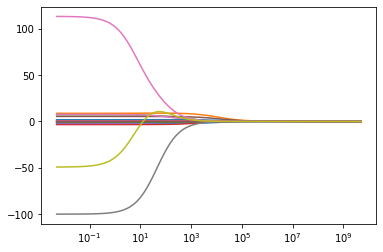

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 14 16:57:45 2020

@author: Onur
"""


import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']]) #kategorik değişkenleri dummiy değişkene çevirdik OneHotencoding yaklaşımı yaptık
    
y=df["Salary"]
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')

x=pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) #concat ile df birleştiriyoruz

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25,random_state=42)
ridge_model=Ridge(alpha=5).fit(x_train,y_train)

ridge_model.coef_   #farklı lambda değerlerine karşı farklı kat sayılar oluşucak
                    #hatalar ortaya çıkıcak incelenecek ve optimum alphaya(lambdaya) karar vericek
ridge_model.intercept_ #sabit kat sayımız

lambdalar=10**np.linspace(10,-2,100)*0.5
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i) #parametreleri ayarlamak(set) için kullanılır.yakaladığı her i değerini modele aplha parametresi olarak atayacak
    ridge_model.fit(x_train,y_train)
    katsayilar.append(ridge_model.coef_) #her modelde oluşan katsayıları listeye ekleyecek
    
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log") #kat sayılar birbirinden farklı olabileceğinden dolayı hepsini gözlemleyebilmek adına ölçek değiştirme işlemi yapacağız


In [6]:
#%%tahmin
ridge_model=Ridge().fit(x_train,y_train)
y_pred=ridge_model.predict(x_train)

#train hatası
RMSE=np.sqrt(mean_squared_error(y_train,y_pred)) #valide edilmemiş doğrulanmamış rmse değeri bu

np.sqrt(np.mean(-cross_val_score(ridge_model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")))
#ikinci bulduğumuz hata daha doğru hata

#test hatası
y_pred=ridge_model.predict(x_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [12]:
#%% model tuning

ridge_model=Ridge().fit(x_train,y_train)
y_pred=ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

lambdalar1=np.random.randint(0,1000,100)
lambdalar2=10**np.linspace(10,-2,100)*0.5

ridgecv=RidgeCV(alphas=lambdalar2,scoring='neg_mean_squared_error',cv=10,normalize=True) #standartlaşma işlemi yapmasını istediğimiz için true değeri döndürdük
ridgecv.fit(x_train,y_train)

ridgecv.alpha_ #modelin optimum parametreyi böyle alıyoruz

0.7599555414764666

In [11]:
#final modeli

ridge_tuned= Ridge(alpha=ridgecv.alpha_).fit(x_train,y_train)

y_pred=ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

#%%farklı lambda için denicez

ridgecv=RidgeCV(alphas=lambdalar1,scoring='neg_mean_squared_error',cv=10,normalize=True) #standartlaşma işlemi yapmasını istediğimiz için true değeri döndürdük
ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_tuned= Ridge(alpha=ridgecv.alpha_).fit(x_train,y_train)

y_pred=ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.35561769907827